In [1]:
import wandb
import numpy as np
import matplotlib.pyplot as plt

api = wandb.Api()

# run is specified by <entity>/<project>/<run_id>
runs = api.runs("qba/no rehersal small net MNIST Task IL")

# save the metrics for the run to a csv file
# metrics_dataframe = run.history()

In [2]:
for run in runs:
    print(run)

<Run qba/no+rehersal+small+net+MNIST+Task+IL/sd0lug7x (finished)>
<Run qba/no+rehersal+small+net+MNIST+Task+IL/j9kark6r (finished)>
<Run qba/no+rehersal+small+net+MNIST+Task+IL/uyugasuv (finished)>
<Run qba/no+rehersal+small+net+MNIST+Task+IL/gv2vahbu (finished)>
<Run qba/no+rehersal+small+net+MNIST+Task+IL/syuwu0uw (finished)>
<Run qba/no+rehersal+small+net+MNIST+Task+IL/kmd3pmmy (finished)>
<Run qba/no+rehersal+small+net+MNIST+Task+IL/cx9dxv0o (finished)>
<Run qba/no+rehersal+small+net+MNIST+Task+IL/bbt7zck2 (finished)>


In [3]:
dfs = {}

for i in range(len(runs)):
    dfs[i] = runs[i].history()

In [4]:
acc_col = ['acc_task_0', 'acc_task_1', 'acc_task_2', 'acc_task_3', 'acc_task_4']

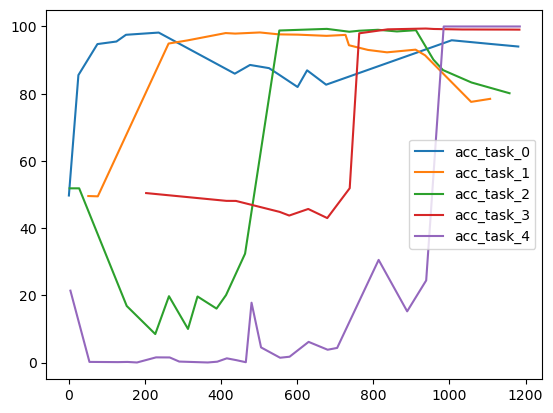

In [13]:
df = dfs[2]

for i in range(len(acc_col)):
    plt.plot(df[[acc_col[i],'_step']].dropna().sort_values(by='_step').set_index('_step'))

plt.legend(acc_col)
plt.show()

In [73]:
# task1 = df[[acc_col[0],'_step']].dropna().sort_values(by='_step').set_index('_step').values
# task2 = df[[acc_col[1],'_step']].dropna().sort_values(by='_step').set_index('_step').values
# task3 = df[[acc_col[2],'_step']].dropna().sort_values(by='_step').set_index('_step').values
# task4 = df[[acc_col[3],'_step']].dropna().sort_values(by='_step').set_index('_step').values
# task5 = df[[acc_col[4],'_step']].dropna().sort_values(by='_step').set_index('_step').values

no_tasks = 5
task = {}
datapoints = {}
for j in range(no_tasks):
    task[j] = np.zeros((25,))
    datapoints[j] = np.zeros((25,))

for i in range(3,len(runs)):
    df = dfs[i]
    for j in range(no_tasks):
        curr_task = df[[acc_col[0],'_step']].dropna().sort_values(by='_step').set_index('_step').values.T[0]
        task[j] += np.concatenate([curr_task, [0 for _ in range(len(task[j])-len(curr_task))]])
        datapoints[j][:len(curr_task)] += 1

    # task1 += np.concatenate([df[[acc_col[0],'_step']].dropna().sort_values(by='_step').set_index('_step').values.T[0], [0 for _ in range(len(task1)-len(df[[acc_col[0],'_step']].dropna().sort_values(by='_step').set_index('_step').values))]])
    # task2 += df[[acc_col[1],'_step']].dropna().sort_values(by='_step').set_index('_step').values
    # task3 += df[[acc_col[2],'_step']].dropna().sort_values(by='_step').set_index('_step').values
    # task4 += df[[acc_col[3],'_step']].dropna().sort_values(by='_step').set_index('_step').values
    # task5 += df[[acc_col[4],'_step']].dropna().sort_values(by='_step').set_index('_step').values

In [74]:
datapoints

{0: array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
        4., 3., 3., 2., 2., 0., 0., 0.]),
 1: array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
        4., 3., 3., 2., 2., 0., 0., 0.]),
 2: array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
        4., 3., 3., 2., 2., 0., 0., 0.]),
 3: array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
        4., 3., 3., 2., 2., 0., 0., 0.]),
 4: array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
        4., 3., 3., 2., 2., 0., 0., 0.])}

In [67]:
task1

array([198.82902527, 243.02139282, 244.03252411, 244.41488647,
       244.22583008, 244.44207382, 244.39109421, 243.94925308,
       242.92963028, 247.62623215, 243.96346664, 243.19874191,
       242.96932602, 289.6684494 , 289.53250122, 288.92072296,
       279.60812378, 237.0390892 ,  97.08853912,  97.08853912,
        48.71458817,  48.71458817,   0.        ,   0.        ,
         0.        ])